# Import Libraries

In [28]:
import numpy as np # Used for generating random coordinates(points) and performing array operations
import matplotlib.pyplot as plt # Used for visualizing the points and the optimal route on a 2D graph
from scipy.spatial import distance_matrix # A function that calculates the distance between each pair of points to create a distance matrix
from itertools import permutations # Used to generate all possible permutations of points visit (routes). This allows us to evaluate all routes in the brute-force solution 

# Generate Random Data Points

In [37]:
np.random.seed(42) # Sets the seed for random number generation, ensuring reproducibility (same results every time you run the code).
num_points = 10 # Specifies that we are working with 6 points (randomly generated points).
points = np.random.rand(num_points, 2) # Generate 6 random(x, y) coordinates in the rang[0, 1], representing the positions of the points on a 2D plane. The result is a 6X2 array, where each row corresponds to a point's coordinates.

# Compute the Distance Matrix

In [40]:
dist_matrix = distance_matrix(points, points) # Computes a matrix where the element at position (i, j) represents the Euclidean distance between point i and the point j. The distance_matrix function calculates this automatically, giving us a 6X6 matrix(since we have 6 points).
# For example, if point[0] = (x1, y1) and point[1] = (x2, y2), then the distance between point 0 and point 1 is:
# d = sqrt((x2-x1)^2 +(y2-y1)^2)

# Solve the TSP Using Brute Force

In [43]:
def tsp_brute_force(dist_matrix): # This function solves the TSP using a brute-force approach by trying every possible permutation of the points and calculating the total distance for each route.
    n = len(dist_matrix) # Gets the number of cities
    all_routes = permutations(range(n)) # Generates all possible ways to visit the cities. For 6 points, there are 6! = 720 possible routes.
    shortest_route = None # Keeps track of the shortest found so far
    min_distance = float("inf") # Initializes the minimum distance to infinity ( a large number) so that any valid route will have a smaller distance.

    for route in all_routes: # Loop through all possible routes: route[i], route[i+1]: For each route (permutation of cities), the distance between each pair of consecutive points is summed.
        current_distance = sum(
            dist_matrix[route[i], route[i+1]] for i in range(n-1)
        ) + dist_matrix[route[-1], route[0]] #Adds the distance from the last point in the route back to the starting point (to complete the tour).
    
    if current_distance < min_distance:
        min_distance = current_distance
        shortest_route = route

    return shortest_route, min_distance # If the current route's distance is smaller than the previously recorded minimum distance, update the shortest_route and min_distance.

# Run the TSP Solver

In [46]:
optimal_route, optimal_distance = tsp_brute_force(dist_matrix) # Calls the functions to solve the TSP.
print(f"Optimal Route: {optimal_route}") # The permutation of cities that represents the shortest route.
print(f"Optimal Distance: {optimal_distance}") # The total distance of the shortest route.

Optimal Route: (9, 8, 7, 6, 5, 4, 3, 2, 1, 0)
Optimal Distance: 6.199931193035985


# Visualize the Route

In [48]:
def plot_route(points, route): # This function plots the optimal route on a 2D graph using Matplotlib
    plt.figure(figsize = (6, 6)) # Creates a figure window of size 8X8 inches.
    plt.scatter(points[:, 0], points[:, 1], c = "red", zorder = 5) # Plots the points as red dotes. points[:, 0] extracts the x-coordinates, and points[:, 1] extracts the y-coordinates.

    for i, point in enumerate(points):
        plt.text(point[0], point[1], f"{i}", fontsize = 12) # Labels each point with its index

    for i in range(len(route)):
        start = route[i]
        end = route[(i + 1) % len(route)]
        plt.plot([points[start, 0], points[end, 0]], [points[start, 1], points[end, 1]], "b-") 
# For loop, it itrates through each point in the optimal route and draws a blue line ("b-") connecting each consecutive pair of points. The line is drawn from the current point (start) to the next point (end), and the route wraps around by connecting the last point to the first.

# Plot the Result

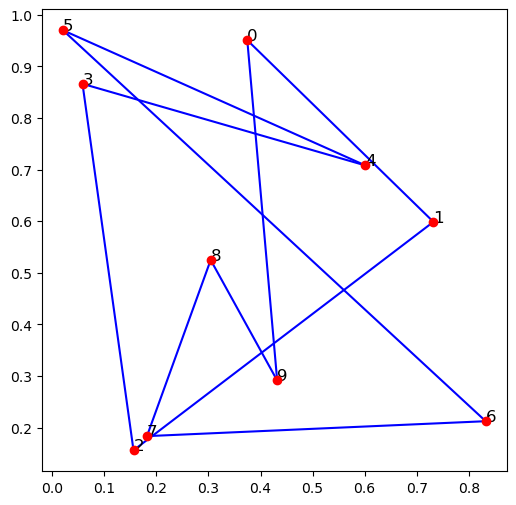

In [52]:
plot_route(points, optimal_route) # Calls the plotting function to display the points and the optimal route on a graph
# Red dots represent points, Blue lines represent the optimal route connecting the points, The graph also shows the total optimal distance in the title.